In [1]:
import numpy as np
import pandas as pd

Q1. Sales Data Analysis
You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.

1.Use your roll number as the random seed to generate unique data for each stud


In [2]:
roll_number = 102316027
np.random.seed(roll_number)


Part I: Randomized Sales Data Generation (NumPy)
Initialize Random Seed

Generate Sales Data:

Create a NumPy array of random sales data for 12 months (shape = (12, 4)), where each column represents a product category:
Electronics, Clothing, Home & Kitchen, Sports.
Sales values should be between 1000 and 5000 units per month.
The range should be randomized using the seed.
Convert to DataFrame

Convert the cleaned NumPy array into a Pandas DataFrame with:
Columns: Electronics, Clothing, Home & Kitchen, Sports
Index: Months from Jan to Dec an to Dec

In [3]:
sales = np.random.randint(1000, 5001, size=(12,4))
print(sales)

[[3058 3070 4387 4369]
 [1833 3811 2483 2917]
 [1914 1267 3269 3367]
 [4703 3350 4545 4270]
 [3493 4375 2047 1129]
 [3516 3911 3499 3065]
 [2110 2530 2884 2678]
 [2772 1111 4784 1819]
 [1475 4376 3567 1206]
 [4606 4196 1136 2168]
 [2407 1368 2093 3582]
 [2025 4484 2473 3075]]


In [4]:
months=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']
colm = ['electronics','clothing','home & kitchen','sports']
sales_df = pd.DataFrame(sales, columns=colm, index=months)
sales_df

,electronics,clothing,home & kitchen,sports
jan,3058,3070,4387,4369
feb,1833,3811,2483,2917
mar,1914,1267,3269,3367
apr,4703,3350,4545,4270
may,3493,4375,2047,1129
june,3516,3911,3499,3065
july,2110,2530,2884,2678
aug,2772,1111,4784,1819
sep,1475,4376,3567,1206
oct,4606,4196,1136,2168



Part II: Data Manipulation and Analysis
1. Display the First 5 Rows and Summary Statistics
We first examine the initial rows and descriptive statistics of the sales data. This helps us understand the distribution, mean, minimum, maximum, and standard deviation of sales across categories.

2. Calculate Total Sales
Total sales per category are calculated by summing up all sales values in each column.
Total sales per month are calculated by summing across the row (i.e., across all four categories).
This gives us a clear idea of which category and which months performed the best in terms of sales.

3. Average Sales Growth Between Consecutive Months
We calculate the month-to-month percentage change for each category using pct_change(). Then, we find the average of these monthly changes for each product category to understand overall growth trends.

The result is expressed as a percentage.

4. Add Total Sales and Growth Rate Columns
Total Sales: A new column that adds up all four product categories per month.
Growth Rate (%): A new column that calculates the percentage change in Total Sales compared to the previous month.
These new columns help to observe overall sales performance trends.

5. Apply a Randomized Discount
Based on the roll number:

If the roll number is even, we apply a 10% discount to the Electronics category

In [5]:
print(sales_df.head(), '\n')
print(sales_df.describe(), '\n')
print(sales_df.sum(), '\n')
print(sales_df.sum(axis=1))

     electronics  clothing  home & kitchen  sports
jan         3058      3070            4387    4369
feb         1833      3811            2483    2917
mar         1914      1267            3269    3367
apr         4703      3350            4545    4270
may         3493      4375            2047    1129 

       electronics     clothing  home & kitchen       sports
count    12.000000    12.000000       12.000000    12.000000
mean   2826.000000  3154.083333     3097.250000  2803.750000
std    1072.044351  1286.388493     1119.522554  1062.791789
min    1475.000000  1111.000000     1136.000000  1129.000000
25%    1997.250000  2239.500000     2378.000000  2080.750000
50%    2589.500000  3580.500000     3076.500000  2991.000000
75%    3498.750000  4240.750000     3772.000000  3420.750000
max    4703.000000  4484.000000     4784.000000  4369.000000 

electronics       33912
clothing          37849
home & kitchen    37167
sports            33645
dtype: int64 

jan     14884
feb     11044
ma

In [6]:
# percantage change 
growth = pd.DataFrame(index=sales_df.index, columns=colm)
for c in colm:
    growth[c] = ((sales_df[c]-sales_df[c].shift(1)) / (sales_df[c].shift(1))) *100
print(growth)
# averaging the change
avg_growth = growth.mean()
print('\n' , avg_growth)


      electronics    clothing  home & kitchen      sports
jan           NaN         NaN             NaN         NaN
feb    -40.058862   24.136808      -43.400957  -33.234150
mar      4.418985  -66.754133       31.655256   15.426808
apr    145.715778  164.404104       39.033344   26.819127
may    -25.728259   30.597015      -54.961496  -73.559719
june     0.658460  -10.605714       70.933073  171.479185
july   -39.988623  -35.310662      -17.576450  -12.626427
aug     31.374408  -56.086957       65.880721  -32.076176
sep    -46.789322  293.879388      -25.438963  -33.699835
oct    212.271186   -4.113346      -68.152509   79.767828
nov    -47.742076  -67.397521       84.242958   65.221402
dec    -15.870378  227.777778       18.155757  -14.154104

 electronics       16.205573
clothing          45.502433
home & kitchen     9.124612
sports            14.487631
dtype: float64


In [7]:
total_sales_m = sales_df.sum(axis=1)
sales_df['Total_sales']=total_sales_m
print(sales_df)

sales_df['Growth_rate'] = sales_df['Total_sales'].pct_change()*100
print('\n',sales_df)


      electronics  clothing  home & kitchen  sports  Total_sales
jan          3058      3070            4387    4369        14884
feb          1833      3811            2483    2917        11044
mar          1914      1267            3269    3367         9817
apr          4703      3350            4545    4270        16868
may          3493      4375            2047    1129        11044
june         3516      3911            3499    3065        13991
july         2110      2530            2884    2678        10202
aug          2772      1111            4784    1819        10486
sep          1475      4376            3567    1206        10624
oct          4606      4196            1136    2168        12106
nov          2407      1368            2093    3582         9450
dec          2025      4484            2473    3075        12057

       electronics  clothing  home & kitchen  sports  Total_sales  Growth_rate
jan          3058      3070            4387    4369        14884          N

In [8]:
sales_df['clothing (SALE)']=sales_df['clothing']*0.85
print(sales_df)


      electronics  clothing  home & kitchen  sports  Total_sales  Growth_rate  \
jan          3058      3070            4387    4369        14884          NaN   
feb          1833      3811            2483    2917        11044   -25.799516   
mar          1914      1267            3269    3367         9817   -11.110105   
apr          4703      3350            4545    4270        16868    71.824386   
may          3493      4375            2047    1129        11044   -34.526915   
june         3516      3911            3499    3065        13991    26.684172   
july         2110      2530            2884    2678        10202   -27.081695   
aug          2772      1111            4784    1819        10486     2.783768   
sep          1475      4376            3567    1206        10624     1.316040   
oct          4606      4196            1136    2168        12106    13.949548   
nov          2407      1368            2093    3582         9450   -21.939534   
dec          2025      4484 

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
- Box plots to show the sales distribuƟon for each category.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

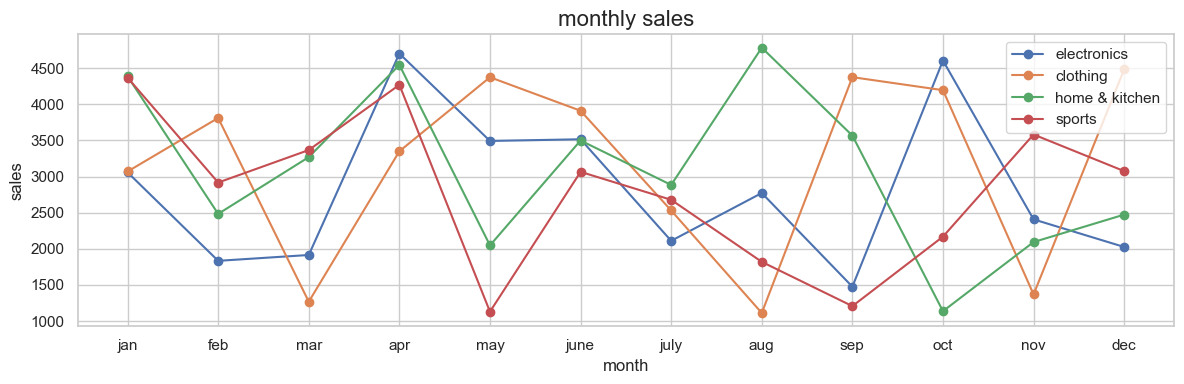

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
for c in colm:
    plt.plot(sales_df.index, sales_df[c], marker='o', label=c)
plt.title("monthly sales", fontsize='16')
plt.xlabel("month")
plt.ylabel("sales")
plt.tight_layout()
plt.legend()
plt.show()

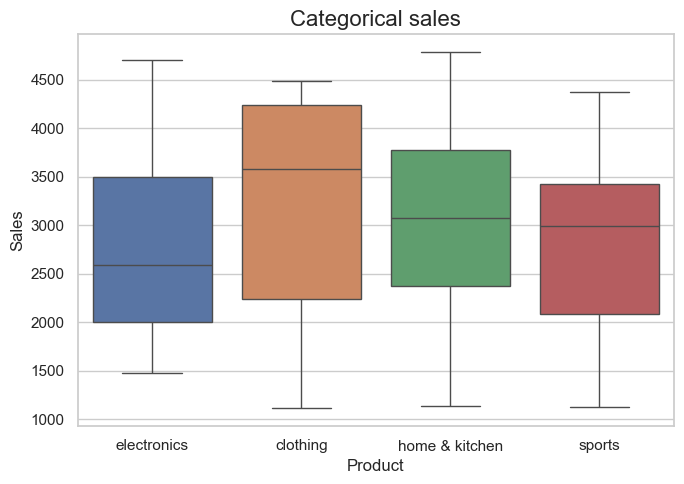

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(data=sales_df[colm])
plt.title('Categorical sales', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
    i. Find element-wise absolute value
   ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each row.
  iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and each row 

In [12]:
array = np.array([[ 1,-2, 3],
                  [-4, 5,-6]])
abs_arr = np.abs(array)
print(abs_arr)

[[1 2 3]
 [4 5 6]]


In [13]:
arr_1d = array.flatten()
percentiled = np.percentile(arr_1d, [25,50,75])
print("Flattened array perenctiles: ", percentiled)

percentiled_colm = np.percentile(array, [25,50,75], axis=0)
print("Column wise array perenctiles: ", percentiled_colm)

percentiled_row = np.percentile(array, [25,50,75], axis=1)
print("Row wise array perenctiles: ", percentiled_row)

Flattened array perenctiles:  [-3.5 -0.5  2.5]
Column wise array perenctiles:  [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Row wise array perenctiles:  [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


In [14]:
mean_flat = np.mean(arr_1d)
median_flat = np.median(arr_1d)
std_flat = np.std(arr_1d)
print(f"Flattened arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=0)
median_flat = np.median(array, axis=0)
std_flat = np.std(array, axis=0)
print(f"Column wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

mean_flat = np.mean(array, axis=1)
median_flat = np.median(array, axis=1)
std_flat = np.std(array, axis=1)
print(f"Row wise arr mean:{mean_flat}, median:{median_flat}, standard dev:{std_flat}")

Flattened arr mean:-0.5, median:-0.5, standard dev:3.8622100754188224
Column wise arr mean:[-1.5  1.5 -1.5], median:[-1.5  1.5 -1.5], standard dev:[2.5 3.5 4.5]
Row wise arr mean:[ 0.66666667 -1.66666667], median:[ 1. -4.], standard dev:[2.05480467 4.78423336]


Q.3 for array : a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
 i. Find floor, ceiling and trunc

In [15]:
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
floor_val=np.floor(a)
ceil_val=np.ceil(a)
trunc_val=np.trunc(a)
print(f"Floor vals: {floor_val}, \nceiling vals: {ceil_val}, \ntruncated vals: {trunc_val}")

Floor vals: [-2. -2. -1.  0.  1.  1.  3.], 
ceiling vals: [-1. -1. -0.  1.  2.  2.  3.], 
truncated vals: [-1. -1. -0.  0.  1.  1.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.


In [16]:
my_list = [10, 20, 30, 40, 50]
i = 1
j = 3
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
print("New list:", my_list)

New list: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [17]:
my_set = {10, 20, 30, 40, 50}
my_list = list(my_set)
i = 0
j = 2
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp
my_set_swapped = set(my_list)
print("Set :", my_set_swapped)

Set : {40, 10, 50, 20, 30}
